<a href="https://colab.research.google.com/github/Uzi78/ML_Projects/blob/main/Linear_Regression_with_Cross_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Reading score of student using Linear Regression with cross validation test**

The ability to accurately predict academic performance is crucial in the education sector, where educators and policymakers strive to enhance learning outcomes. This project focuses on predicting the reading scores of students using linear regression, a fundamental machine learning technique. By leveraging data on various factors that could influence academic performance—such as study habits, previous grades, and family background—we aim to build a model that can provide reliable predictions. Additionally, this project incorporates cross-validation, a robust method to evaluate the model’s performance and ensure its generalizability across different subsets of data.

## **Objectives**
Data Preprocessing: To clean and prepare the dataset, ensuring it is suitable for modeling by handling missing values, encoding categorical variables, and normalizing numerical features.

Feature Selection:
To identify and select the most relevant features that have a significant impact on students' reading scores, enhancing the model’s accuracy and interpretability.

Model Development:
To build a linear regression model that predicts the reading scores of students based on the selected features, providing a baseline understanding of the relationship between the input factors and the output

Cross-Validation:
To implement cross-validation techniques, specifically k-fold cross-validation, to evaluate the model's performance and ensure its consistency across different data splits.

Model Evaluation:
To assess the model's performance using metrics like Mean Squared Error (MSE), both on the cross-validated training set and the unseen test set, to validate its predictive power.

Result Interpretation:
To analyze the results, particularly the MSE scores from cross-validation and the test set, to draw conclusions about the model’s effectiveness in predicting reading scores and to identify areas for potential improvement.

## Import Libraries

In [18]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## Loading Data

In [4]:
data = pd.read_csv('/content/StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Data Exploration

In [5]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## **Data PreProcessing**

### Convert Variables

In [6]:
data= pd.get_dummies(data , drop_first=True)
print(data.head())

   math score  reading score  writing score  gender_male  \
0          72             72             74        False   
1          69             90             88        False   
2          90             95             93        False   
3          47             57             44         True   
4          76             78             75         True   

   race/ethnicity_group B  race/ethnicity_group C  race/ethnicity_group D  \
0                    True                   False                   False   
1                   False                    True                   False   
2                    True                   False                   False   
3                   False                   False                   False   
4                   False                    True                   False   

   race/ethnicity_group E  parental level of education_bachelor's degree  \
0                   False                                           True   
1                   Fals

### Fetaure Selection

In [7]:
x = data.drop(['reading score'], axis=1)
y = data['reading score']

### Splitting the data

In [8]:
x_test,x_train,y_test,y_train = train_test_split(x,y,test_size=0.2,random_state=42)

## **Model Training**

In [9]:
model = LinearRegression()

### Cross-Validation with Train-Test Split

In [11]:
cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')

In [12]:
mse_scores = -cv_scores
mean_cv_mse = np.mean(mse_scores)
std_cv_mse = np.std(mse_scores)

In [14]:
model.fit(x_train, y_train)

LinearRegression()

## **Model Evaluation**

In [16]:
test_predictions = model.predict(x_test)
test_mse = np.mean((y_test - test_predictions) ** 2)

## **Visualization**

In [17]:
print(f"Cross-Validation MSE Scores on Training Set: {mse_scores}")
print(f"Mean Cross-Validation MSE on Training Set: {mean_cv_mse:.2f}")
print(f"Standard Deviation of Cross-Validation MSE: {std_cv_mse:.2f}")
print(f"Test Set MSE: {test_mse:.2f}")

Cross-Validation MSE Scores on Training Set: [19.18969473 22.97555793 16.20498688 20.13840093 22.59763448]
Mean Cross-Validation MSE on Training Set: 20.22
Standard Deviation of Cross-Validation MSE: 2.47
Test Set MSE: 16.78


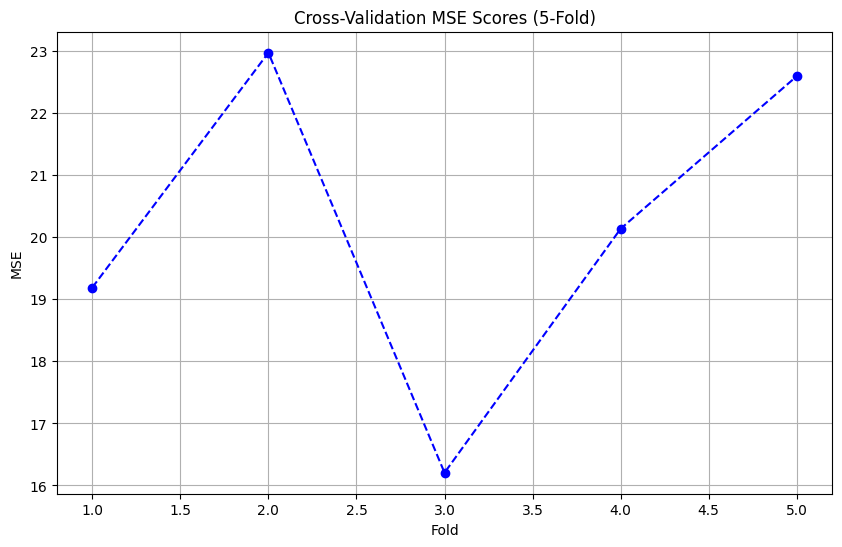

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), mse_scores, marker='o', linestyle='--', color='b')
plt.title('Cross-Validation MSE Scores (5-Fold)')
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

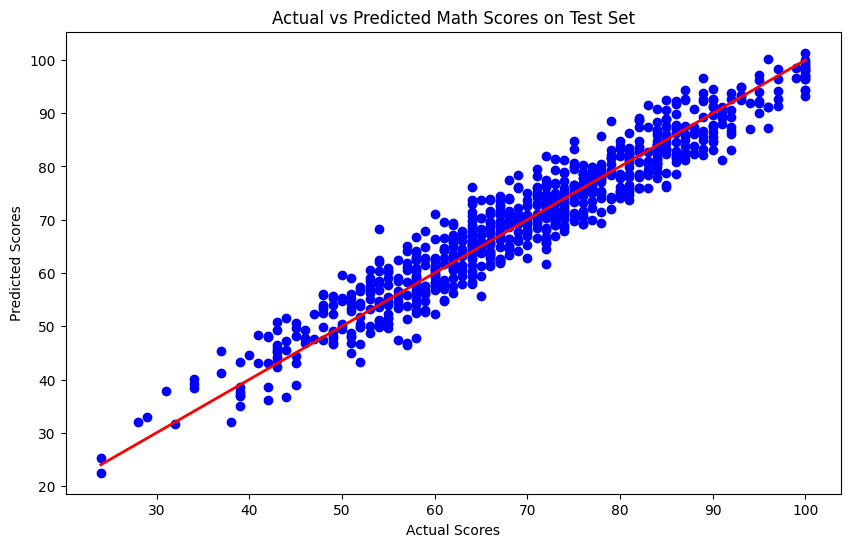

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_predictions, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],color='red', lw=2)
plt.title('Actual vs Predicted Math Scores on Test Set')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.show()